##Customer Segmentation using K-Means Clustering

In [1]:
# https://www.youtube.com/watch?v=SrY0sTJchHE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visalisation
from sklearn.cluster import KMeans

Data collection ans Analysis

##Loading data and filtering

In [2]:
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.shape

(200, 5)

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#check missing data
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##Choosing Annual income and Pending score column

In [8]:
x=customer_data.iloc[:,[3,4]].values #we have sliced multiple columns
# print(x)

##Choosing number of clusters

WCSS -> Within Clusters Sum Of Squares
Distance b/w each clusters and centroid

In [9]:
#Finding WCCS value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state = 42)
  #random_state is used how data need to be splitted, not important
  kmeans.fit(x)

  wcss.append(kmeans.inertia_)#gives wcss value for each clusters


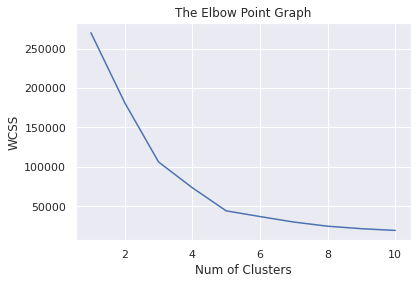

In [10]:
#Plotting elbow graph

sns.set()

plt.plot(range(1,11),wcss) #(x,y)
plt.title('The Elbow Point Graph')
plt.xlabel('Num of Clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
#observe sharp cuttings suggests significant drop

Optimum Number of Clusters =5

##Training the k-means Clustering Model

In [12]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)

# return label for each data point based on their clusters
y = kmeans.fit_predict(x)

print(y)


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


##Visualising the data

K-Means algorithm first creates centroid for each clusters
then it tries to find nearest centroid for every datapoint and matches that clusters

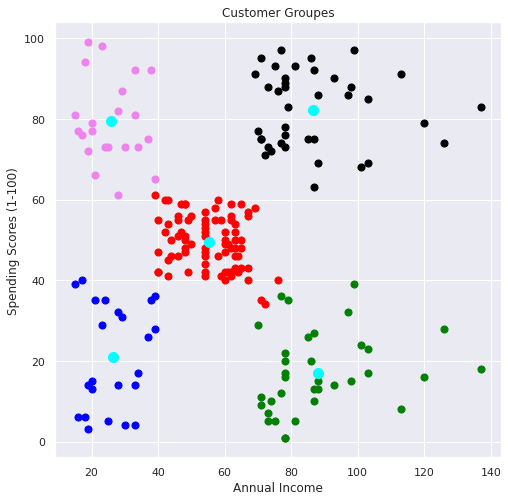

In [14]:
# plotting all the clusters and their centroid

plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1], s=50,c='green',label='Cluster 1')
plt.scatter(x[y==1,0],x[y==1,1], s=50,c='red',label='Cluster 2')
plt.scatter(x[y==2,0],x[y==2,1], s=50,c='black',label='Cluster 3')
plt.scatter(x[y==3,0],x[y==3,1], s=50,c='violet',label='Cluster 4')
plt.scatter(x[y==4,0],x[y==4,1], s=50,c='blue',label='Cluster 5')

#variable x has 5 clusters
#varaiable y has only 2 columns

#plot the centroids

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='cyan' , label='Centroid')
#plt.scatter(x axis value of centroid=0, y axis value of centroid=1 )
#s -> size of dots
#c -> color

plt.title('Customer Groupes')
plt.xlabel('Annual Income')
plt.ylabel('Spending Scores (1-100)')
plt.show()


1.   Blue = less income and less purchase
2.   purple = less income and  more purchase
3.   green = more income and less purchase
4.   black = more income more purchase






Market can attract blue group people providing some discounts

Market can attract green people who have money but not buying more things

**Project applications**
*   Netflix suggesting group of people who are watching some genre more
*   Google ads

